# Genetic Algorithm and Its Applications (October 14th, 2024)

In [ ]:
!gdown -cq 1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0

## Exercise 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName="advertising.csv"):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]

    features_X = np.insert(features_X, 0, 1, axis=1)
    # sales_Y = sales_Y.reshape(-1, 1)

    return features_X, sales_Y

In [ ]:
features_X, _ = load_data_from_file()
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [ ]:
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


## Exercise 2

In [ ]:
def create_individual(n=4, bound=10):
    individual = []
    # *************** Your code here *******
    for _ in range(n):
        individual.append(random.uniform(-bound/2, bound/2))

    return individual


individual = create_individual()
print(individual)

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


## Exercise 3

In [ ]:
features_X, sales_Y = load_data_from_file()


def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
    return loss


def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 0
    # ************ your code here ************
    fitness_value = 1 / (loss + 1)
    return fitness_value

In [ ]:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


## Exercise 4

In [ ]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    # *************** Your code here ***************
    for index in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[index], individual2_new[index] = individual2_new[index], individual1_new[index]

    return individual1_new, individual2_new

In [ ]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1 :", individual1)
print("individual2 :", individual2)

individual1 : [3.44, 2.57, -0.79, -2.41]
individual2 : [4.09, 4.82, 3.1, 4.02]


## Exercise 5

In [ ]:
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    # ******** Your code here ******************
    for index in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual_m[index] = random.uniform(-10/2, 10/2)
    return individual_m

In [ ]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate=2.0)
print(before_individual == after_individual)

False


## Exercise 6

In [ ]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

## Exercise 7

In [ ]:
def selection(sorted_old_population, m=100):
    index1 = random.randint(0, m - 1)
    while True:
        index2 = random.randint(0, m - 1)
        if (index2 != index1):
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    return individual_s

In [ ]:
population = initializePopulation(m=100)
individual_s = selection(population, m=100)
print(individual_s)

[-0.8558201172275268, 1.5083286226334502, -4.984757781432798, -3.076904587553242]


## Exercise 8

In [ ]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)
    if gen % 1 == 0:
        print("Best loss:", compute_loss(
            sorted_population[m - 1]), "with chromsome:", sorted_population[m - 1])
    new_population = []
    while len(new_population) < m-elitism:
        # selection
        # **************** your code here ****************
        individual_1 = selection(sorted_population, m)
        individual_2 = selection(sorted_population, m)

        # crossover
        # **************** your code here ****************
        individual_1, individual_2 = crossover(individual_1, individual_2)

        # mutation
        # **************** your code here ****************
        individual_1 = mutate(individual_1)
        individual_2 = mutate(individual_2)

        new_population.append(individual_1)
        new_population.append(individual_2)
    # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m - elitism:]:
        # **************** your code here ****************
        new_population.append(ind)
    return new_population, compute_loss(sorted_population[m - 1])

In [ ]:
# Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

## Exercise 9

In [ ]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []
    for i in range(n_generations):
        # *********** your code here *************
        population, loss = create_new_population(population, elitism=2, gen=i)
        losses_list.append(loss)
    return population, losses_list

## Exercise 10

Best loss: 1201.7129668592202 with chromsome: [4.095301388677878, 0.253749699316125, -0.585044837715218, 0.49071392769668964]
Best loss: 827.1601122496107 with chromsome: [-3.803217418039233, 0.253749699316125, -0.585044837715218, 0.49071392769668964]
Best loss: 491.85927841974814 with chromsome: [0.8838210406555183, 0.18765742056064205, 0.26535622129293035, -0.024918116226627873]
Best loss: 160.18723783879707 with chromsome: [-3.7470938623341867, 0.18765742056064205, -0.24434888504311747, -0.024918116226627873]
Best loss: 160.18723783879707 with chromsome: [-3.7470938623341867, 0.18765742056064205, -0.24434888504311747, -0.024918116226627873]
Best loss: 99.29646522754236 with chromsome: [1.7760356580522316, -0.0024414990101142564, 0.26535622129293035, -0.024918116226627873]
Best loss: 99.29646522754236 with chromsome: [1.7760356580522316, -0.0024414990101142564, 0.26535622129293035, -0.024918116226627873]
Best loss: 74.72024455227258 with chromsome: [1.7760356580522316, -0.00244149901

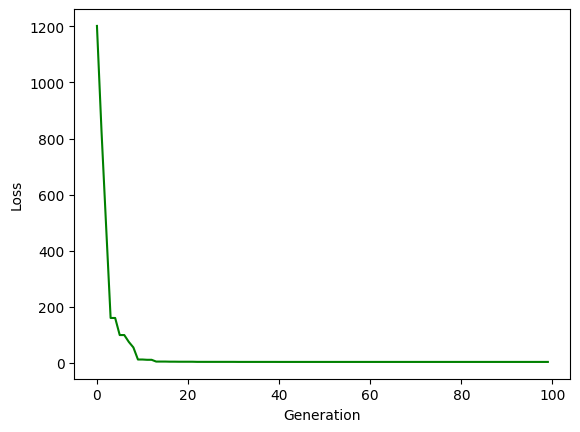

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


def visualize_loss(losses_list):
    # *********** your code here *************
    # random.seed(0)
    plt.plot(losses_list, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Loss')


population, losses_list = run_GA()
visualize_loss(losses_list)

## Exercise 11

[3.3584880432920183, 0.06459656270053848, 0.10602556323889267, -0.005964585295026303]


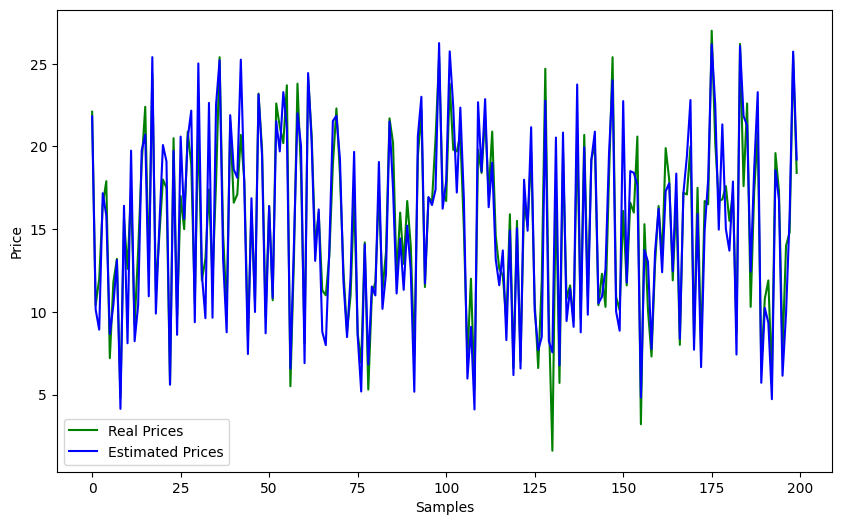

In [ ]:
def visualize_predict_gt():
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])
    estimated_prices = []
    for feature in features_X:
        # ************* your code here *************
        estimated_prices.append(feature.dot(theta))
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()


visualize_predict_gt()